# Advanced Data Science
<p/>

### Data Preprocessing - Finishing Up

In [2]:
#Example of supress warnings for Numpy version out of range (optional)
import warnings
warnings.filterwarnings("ignore", category=Warning)

#Pull in the libraries we need
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_digits

#New libraries for access to transformation and preprocessing tasks
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import Counter

#Pull in the plotting library and specify to display inline/static images
import matplotlib.pyplot as plt
%matplotlib inline

## Scikit Learn `load_digits`
---
We access the Scikit Learn Toolkit at: https://scikit-learn.org

To get to the pre-loaded data, navigate to the API menu to find:<br>
https://scikit-learn.org/stable/api/sklearn.datasets.html

Our experiments today will be using the `load_digits` dataset

In [3]:
#First step is to load the data into an oject
digitsRaw = load_digits()

In [4]:
#Using the shape command, you can investigate the dimensionality
print('Shape of Data (X):',digitsRaw.data.shape)
print('Shape of Target Data (y)', digitsRaw.target.shape)

#We have 1797 data samples, observations, or images each 8x8 in size
print('Shape of each of images', digitsRaw.images.shape)

Shape of Data (X): (1797, 64)
Shape of Target Data (y) (1797,)
Shape of each of images (1797, 8, 8)


In [5]:
#We can load the data into a pandas dataframe and setup separate X and y variables
digitsData = DataFrame(digitsRaw.data)

#This is an example you can then use for preprocessing and beyond if you would like
X = digitsData
y = digitsRaw.target

#However, for this example, we will use the digitsRaw data
#digitsRaw.images[0]

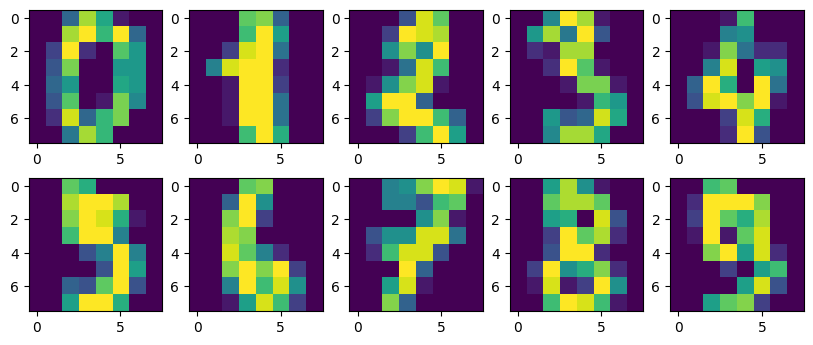

In [6]:
#Setup a figure to display the first 10 images, in 5 columns and 2 rows
plt.figure(figsize=(5*2, 2*2))

#Loop through and plot all of them using the imshow command
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digitsRaw.images[i,:,:])#, cmap='gray')

## Balanced vs. Imbalanced Data

In [7]:
#Check the classes/target vector to see if our data is balanced
print('Original Counts:', dict(sorted(Counter(digitsRaw.target).items())))

#Simulate imbalanced dataset by duplicating class 1, for demonstration purposes today
X_imbalanced = np.vstack([digitsRaw.data[:-1, :], digitsRaw.data[digitsRaw.target == 1]])
y_imbalanced = np.hstack([digitsRaw.target[:-1], digitsRaw.target[digitsRaw.target == 1]])
print('Updated Counts: ', dict(sorted(Counter(y_imbalanced).items())))

#Now that we have some extra data, we will shuffle it in to mimic a real dataset
X_imbalanced, y_imbalanced = shuffle(X_imbalanced, y_imbalanced, random_state=42)
#print('Shape check', X_imbalanced.shape, 'which has', X_imbalanced.shape[0]-digits.data.shape[0], 'more observations')

Original Counts: {np.int64(0): 178, np.int64(1): 182, np.int64(2): 177, np.int64(3): 183, np.int64(4): 181, np.int64(5): 182, np.int64(6): 181, np.int64(7): 179, np.int64(8): 174, np.int64(9): 180}
Updated Counts:  {np.int64(0): 178, np.int64(1): 364, np.int64(2): 177, np.int64(3): 183, np.int64(4): 181, np.int64(5): 182, np.int64(6): 181, np.int64(7): 179, np.int64(8): 173, np.int64(9): 180}


## Merging and Aggregation

In [8]:
#Merge data for demonstration purposes, adding 10 features with random data for demonstration purposes
X_merged = np.hstack([X_imbalanced, np.random.randn(X_imbalanced.shape[0], 10)])

# Aggregation (not a typical aggregation, just combining with random data)
# Take only the first 20 features for aggregation
X_agg = X_merged[:, :20]  

#Let's take a pulse check on our sizes now (we have several datasets now in work :)
#Using the shape command, you can investigate the dimensionality
#We have 1797 data samples, observations, or images each 8x8 in size
print('Shape of Original Data:',digitsRaw.data.shape)
print('Shape of Target Data (y)', digitsRaw.target.shape)
print('Shape of Imbalanced Data with 181 more observations:',X_imbalanced.shape)
print('Shape of Imbalanced Target Data with 181 more observations:',y_imbalanced.shape)
print('Shape of Merged Data with 10 more features:',X_merged.shape)
print('Shape of Aggregated Data with just 20 features now:',X_agg.shape)
print('\nWe shall move forward with X_agg', X_agg.shape, 'and y_imbalanced', y_imbalanced.shape)

Shape of Original Data: (1797, 64)
Shape of Target Data (y) (1797,)
Shape of Imbalanced Data with 181 more observations: (1978, 64)
Shape of Imbalanced Target Data with 181 more observations: (1978,)
Shape of Merged Data with 10 more features: (1978, 74)
Shape of Aggregated Data with just 20 features now: (1978, 20)

We shall move forward with X_agg (1978, 20) and y_imbalanced (1978,)


## Feature Selection

In [9]:
#Are the 20 features we have in our datset the best subset of features?
#Feature selection using SelectKBest with chi-squared test
#chi2 = used in statistics to analyze the relationship between categorical variables
k_best = SelectKBest(score_func=chi2, k=10)
X_selected = k_best.fit_transform(X_agg, y_imbalanced)
X_selected.shape

(1978, 10)

## Principle Component Analysis

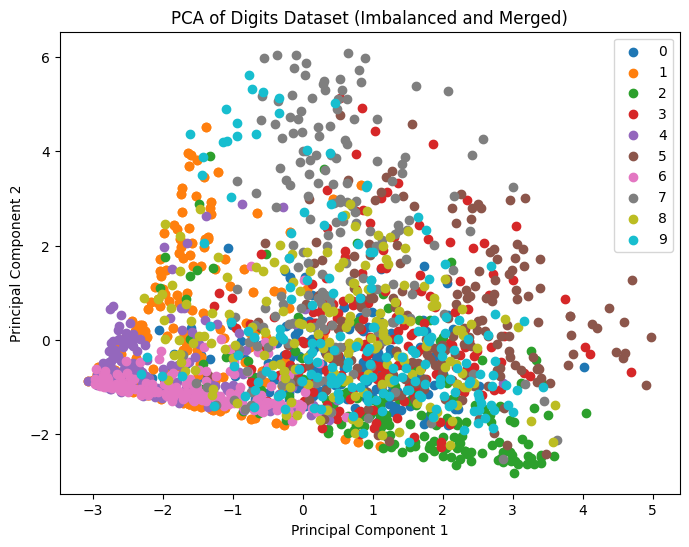

In [10]:
#Standardize features, since it is critical to have standardized features with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

#PCA reduce to 2 for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Plot the PCA-reduced data
plt.figure(figsize=(8, 6))
for i in np.unique(y_imbalanced):
    plt.scatter(X_pca[y_imbalanced == i, 0], X_pca[y_imbalanced == i, 1], label=str(i))
plt.title('PCA of Digits Dataset (Imbalanced and Merged)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [11]:
#Data splitting (train, test, validate) - using the X_scaled or X_pca data for this example
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_imbalanced, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_pca, y_imbalanced, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)